In [96]:
import json

In [88]:
with open('all_RC.json', 'r') as json_file:
    json_objects = json.load(json_file)

In [89]:
subreddits = [item['subreddit'] for item in json_objects]

In [97]:
from collections import Counter

sorted_subreddit_counts = Counter(subreddits).most_common()
# sorted_subreddit_counts

In [98]:
with open('all_RC_with_labels_addition.json', 'r') as json_file:
    json_objects = json.load(json_file)
    
RCs = []

for comment in json_objects:
    if comment['label']==1:
        RCs.append(comment)

In [99]:
len(RCs)

5610

In [100]:
with open('topic_detection_gpt3.5.json', 'r') as json_file:
    topics = json.load(json_file)

In [101]:
for i, obj in enumerate(RCs):
    obj['topic'] = topics[i][1][0]

In [102]:
RCs[0]

{'all_awardings': [],
 'archived': False,
 'associated_award': None,
 'author': 'Icy-Ad-9142',
 'author_created_utc': 1615533496,
 'author_flair_background_color': None,
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_template_id': None,
 'author_flair_text': None,
 'author_flair_text_color': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_auyws8rf',
 'author_patreon_flair': False,
 'author_premium': False,
 'body': 'That is the thing, I understand these lines are just drawn somewhere and some states/cities can culturally identify with a different area, but the only "coast" Ohio has is Lake Erie.',
 'can_gild': True,
 'collapsed': False,
 'collapsed_because_crowd_control': None,
 'collapsed_reason': None,
 'collapsed_reason_code': None,
 'comment_type': None,
 'controversiality': 0,
 'created_utc': 1659320769,
 'distinguished': None,
 'edited': False,
 'gilded': 0,
 'gildings': {},
 'id': 'iigk8fp',
 'is_submitter': False,
 'link_id': 't3_wczw6

In [113]:
df = pd.DataFrame(RCs)

In [114]:
df = df[df['topic'].isin(['A', 'B', 'C', 'D', 'E'])]

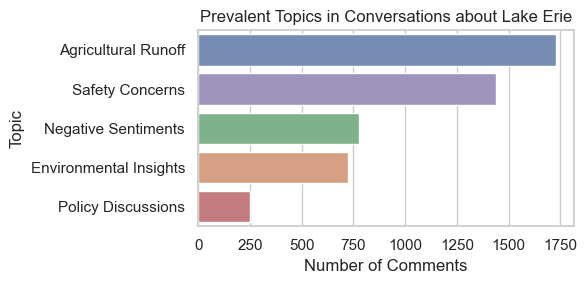

In [123]:
# Now that we have the color hex codes, let's create a count plot using these specific colors.

# Setting the style
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
# Define the color palette
custom_palette = {
    "A": "#9A8EC2",
    "C": "#CF7175",
    "E": "#77B986",
    "D": "#E39C75",
    "B": "#6C8ABB"
}

# Assuming 'df' is a pandas DataFrame that contains a 'topic' column with categorical data.
# Here we are creating a sample DataFrame for demonstration purposes.
# Replace this with your actual DataFrame 'df'.
import pandas as pd
import numpy as np

np.random.seed(10)
data = df

# Creating the count plot with the custom color palette
ax = sns.countplot(y='topic', data=df, order=df['topic'].value_counts().index, palette=custom_palette)

# Customizing the plot with labels and title
ax.set_xlabel('Number of Comments', fontsize=12)
ax.set_ylabel('Topic', fontsize=12)
ax.set_title('Prevalent Topics in Conversations about Lake Erie', fontsize=12)

# Example of setting arbitrary y-labels is not necessary here as we're using the descriptive names directly
labels_map = {
    "A": "Safety Concerns",
    "B": "Agricultural Runoff",
    "C": "Policy Discussions",
    "D": "Environmental Insights",
    "E": "Negative Sentiments"
}
# Applying the mapping to the y-tick labels
ax.set_yticklabels([labels_map.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()])
# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [109]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:
df.columns

Index(['name', 'subreddit', 'month', 'created', 'label', 'topic', 'body'], dtype='object')

In [75]:
df[['name', 'subreddit', 'month', 'created', 'label', 'topic', 'body']].to_csv('lake-erie-reddit_all.csv', index=False)

In [76]:
df = df[['name', 'subreddit', 'month', 'created', 'label', 'topic', 'body']]

In [77]:
df = df[df['month']!='2019-05']

In [78]:
df[df['topic']=='B'].body.iloc[22]

"If you look at that 2011 picture, there's no way the amount starting in Lake St Clair could build up in the larger lake erie to the concentration seen right around Toldedo."

In [82]:
# df.month.value_counts()

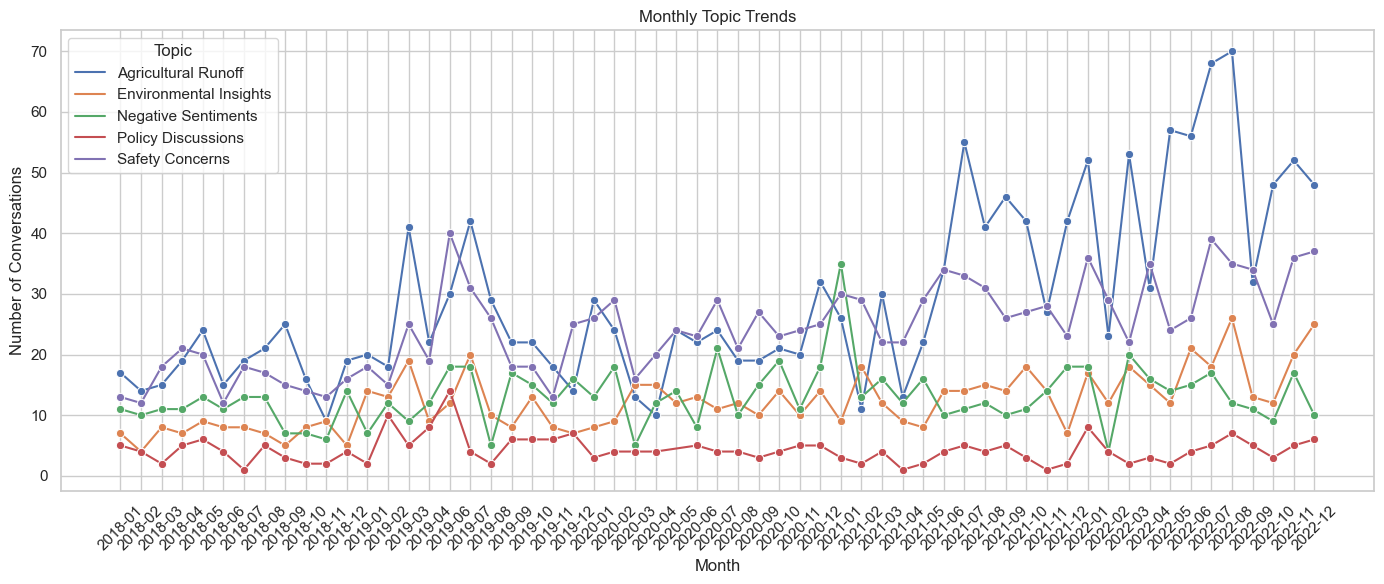

In [83]:
# df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

plt.figure(figsize=(14, 6))
# Mapping topics to more descriptive names
topic_labels = {
    "A": "Safety Concerns",
    "B": "Agricultural Runoff",
    "C": "Policy Discussions",
    "D": "Environmental Insights",
    "E": "Negative Sentiments"
}
df['topic_label'] = df['topic'].map(topic_labels)

# Counting occurrences by month and topic
df_count = df.groupby(['month', 'topic_label']).size().reset_index(name='counts')

# Creating the line plot
sns.lineplot(data=df_count, x='month', y='counts', hue='topic_label', marker='o')


# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Number of Conversations')
plt.title('Monthly Topic Trends')
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.legend(title='Topic')

plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
plt.show()

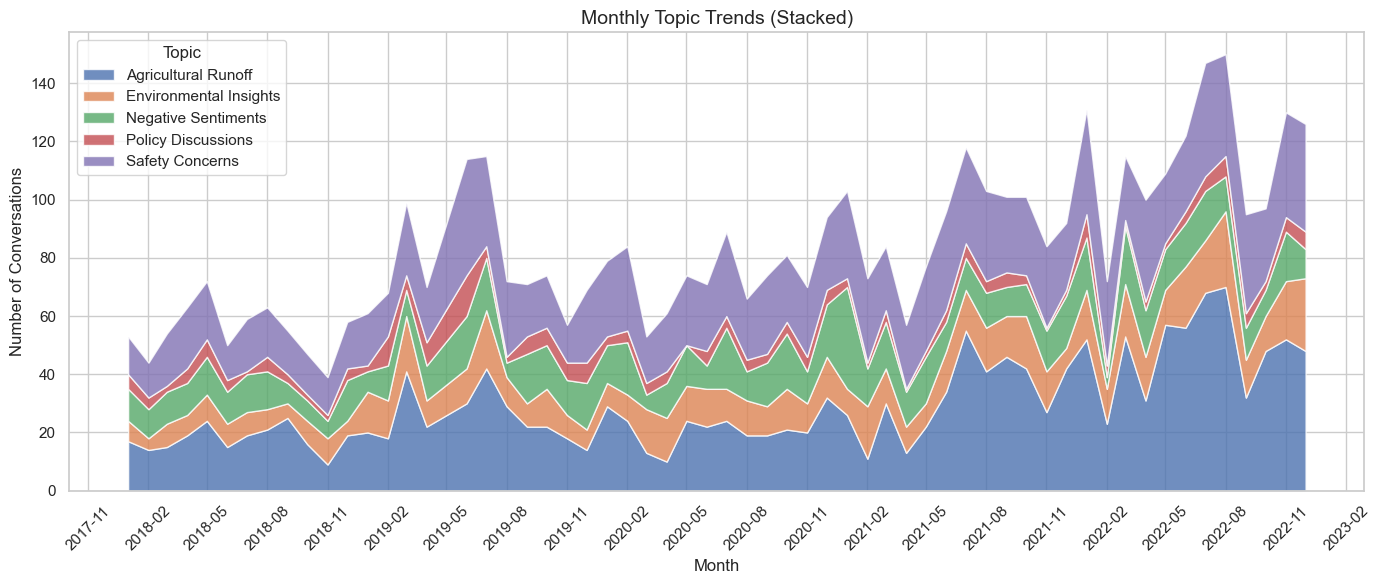

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has been prepared up to the 'df_count' step as per your provided code

# Convert 'month' from string to datetime to ensure proper sorting
df_count['month'] = pd.to_datetime(df_count['month'])

# Pivot the data to get 'month' as index and topics as columns with their counts as values
df_pivoted = df_count.pivot(index='month', columns='topic_label', values='counts').fillna(0)

# Ensure months are sorted after pivot
df_pivoted.sort_index(inplace=True)

# Plotting the stacked area plot
plt.figure(figsize=(14, 6))
plt.stackplot(df_pivoted.index, df_pivoted.T, labels=df_pivoted.columns, alpha=0.8)

# Customizing the plot
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Conversations', fontsize=12)
plt.title('Monthly Topic Trends (Stacked)', fontsize=14)

# Adjusting the x-axis labels to show every 3 months
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Topic', loc='upper left')

plt.tight_layout()
plt.show()


In [107]:
# Let's plot an empty figure to extract the default color cycle from Matplotlib.
plt.figure()
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
default_colors


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

<Figure size 640x480 with 0 Axes>